In [1]:
#Load Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


#Load Machine Learning Libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
data=pd.read_csv("customer_churn.csv")

# Data Manipultion

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
customer_5=data.iloc[:,4]
customer_5

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041     No
7042     No
Name: Dependents, Length: 7043, dtype: object

In [5]:
customer_15=data.iloc[:,14]
customer_15

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040     No
7041     No
7042    Yes
Name: StreamingMovies, Length: 7043, dtype: object

In [6]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
senior_male_electronic=data[(data['gender']=='Male') & (data['SeniorCitizen']==1) & (data["PaymentMethod"]=='Electronic check')]
senior_male_electronic

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.3,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6837,6229-LSCKB,Male,1,No,No,6,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,79.70,497.6,No
6894,1400-MMYXY,Male,1,Yes,No,3,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.90,334.65,Yes
6914,7142-HVGBG,Male,1,Yes,No,43,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.00,4414.3,Yes
6967,8739-WWKDU,Male,1,No,No,25,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,89.50,2196.15,Yes


In [8]:
customer_total_tenure=data[(data['tenure']>70) | (data['MonthlyCharges']>100)]
customer_total_tenure

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.4,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No


In [9]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
two_mail_yes=data[(data['Contract']=='Two year') & (data['PaymentMethod']=='Mailed check') & (data['Churn']=='Yes')]
two_mail_yes

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.6,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.3,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


In [11]:
customer_333=data.sample(n=333)
customer_333

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2642,2195-ZRVAX,Female,0,Yes,No,47,Yes,No,Fiber optic,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,85.30,4045.65,Yes
4008,0743-HRVFF,Female,0,Yes,Yes,51,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,56.15,2898.95,No
6871,4070-OKWVH,Female,0,Yes,No,52,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,No,Bank transfer (automatic),94.60,5025.8,No
6421,2999-AANRQ,Female,0,No,No,21,Yes,No,DSL,Yes,...,No,Yes,Yes,No,Two year,No,Credit card (automatic),71.05,1524.85,No
3230,8043-PNYSD,Male,0,Yes,Yes,63,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.55,1245.6,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6762,9863-JZAIC,Male,0,No,No,35,Yes,No,DSL,No,...,No,No,Yes,No,Month-to-month,No,Mailed check,55.00,2010.55,Yes
6227,2842-JTCCU,Male,0,No,No,2,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),46.05,80.35,Yes
4986,2694-CIUMO,Female,0,No,No,12,Yes,Yes,Fiber optic,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),79.55,958.25,No
6512,1353-LJWEM,Male,0,No,No,11,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Electronic check,60.90,688.5,No


In [12]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

# Data Visualization

In [13]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
#Bar_plot
data['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [15]:
x=data['InternetService'].value_counts().keys()
x

Index(['Fiber optic', 'DSL', 'No'], dtype='object')

In [16]:
y=data['InternetService'].value_counts().tolist()
y

[3096, 2421, 1526]

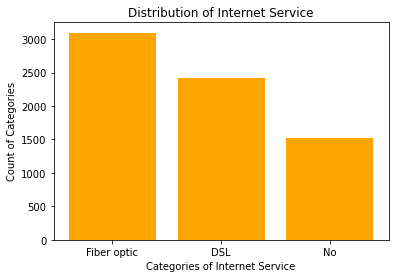

In [17]:
plt.bar(x,y,color="orange")
plt.xlabel("Categories of Internet Service")
plt.ylabel("Count of Categories")
plt.title("Distribution of Internet Service")
plt.show()

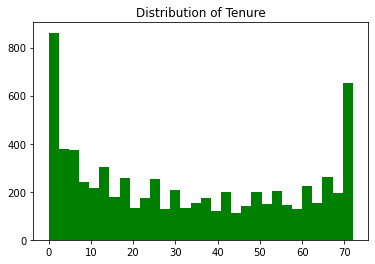

In [18]:
plt.hist(data['tenure'],bins=30,color="green")
plt.title("Distribution of Tenure")
plt.show()

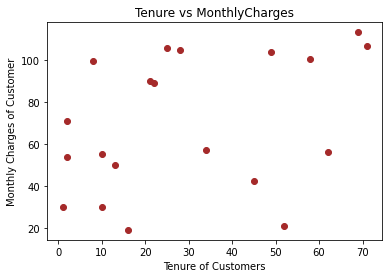

In [19]:
plt.scatter(x=data['tenure'].head(20),y=data['MonthlyCharges'].head(20),color='brown')
plt.xlabel("Tenure of Customers")
plt.ylabel("Monthly Charges of Customer")
plt.title("Tenure vs MonthlyCharges")
plt.show()

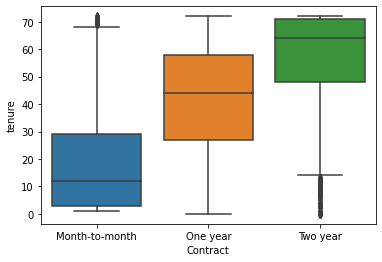

In [20]:
sns.boxplot(x=data['Contract'],y=data['tenure'])
plt.show()

# Linear Regression

In [21]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [22]:
x=pd.DataFrame(data['tenure']) #independent Variable
y=data['MonthlyCharges'] #dependent variable

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=0)

In [24]:
print(data.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7043, 21)
(4930, 1)
(2113, 1)
(4930,)
(2113,)


In [25]:
lr=LinearRegression()

In [26]:
lr.fit(x_train,y_train)

LinearRegression()

In [27]:
y_pred=lr.predict(x_test)
y_pred  #predicted Values

array([60.95089608, 72.98096699, 59.1903979 , ..., 75.62171426,
       70.63363608, 65.6455579 ])

In [28]:
y_test.values #Original values

array([ 58.2 , 116.6 ,  71.95, ..., 109.95,  24.55,  81.6 ])

In [29]:
x_test.values

array([[19],
       [60],
       [13],
       ...,
       [69],
       [52],
       [35]], dtype=int64)

In [30]:
msc=mean_squared_error(y_pred,y_test)

In [31]:
error=np.sqrt(msc)

In [32]:
error

29.394584027273893

# Simple Logistic

In [33]:
x=pd.DataFrame(data['MonthlyCharges'])

In [34]:
y=data['Churn']

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.65,random_state=0)

In [36]:
lr=LogisticRegression()

In [37]:
lr.fit(x_train,y_train)

LogisticRegression()

In [38]:
y_pred=lr.predict(x_test)

In [39]:
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [40]:
y_test.values

array(['No', 'No', 'No', ..., 'Yes', 'No', 'No'], dtype=object)

In [41]:
confusion_matrix(y_pred,y_test)

array([[1815,  651],
       [   0,    0]], dtype=int64)

In [42]:
#(1815+0)/(1815+651+0+0)

In [43]:
accuracy_score(y_pred,y_test)

0.7360097323600974

# Multiple Logistic regression


In [44]:
x=pd.DataFrame(data.loc[:,['tenure','MonthlyCharges']]) #independent variables

In [45]:
y=data['Churn']

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.80,random_state=0)

In [47]:
mlr=LogisticRegression()

In [48]:
mlr.fit(x_train,y_train)

LogisticRegression()

In [49]:
y_pred=mlr.predict(x_test)

In [50]:
confusion_matrix(y_pred,y_test)

array([[934, 212],
       [107, 156]], dtype=int64)

          No  Yes  -> actual
No        934, 212
yes       107, 156
predicted

In [51]:
#(934+156)/(934+212+107+156)

In [52]:
accuracy_score(y_pred,y_test)

0.7735982966643009

# Decision Tree

In [53]:
x=pd.DataFrame(data['tenure'])

In [54]:
y=data['Churn']

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.80,random_state=0)

In [56]:
dt=DecisionTreeClassifier()

In [57]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [58]:
y_pred=dt.predict(x_test)

In [59]:
confusion_matrix(y_pred,y_test)

array([[965, 281],
       [ 76,  87]], dtype=int64)

          No    Yes  ->actual
No         965, 281
Yes        76,  87

predicted

In [60]:
#(965+87)/(965+281+76+87)

In [61]:
accuracy_score(y_pred,y_test)

0.7466288147622427

# Random Forest

In [62]:
x=pd.DataFrame(data.loc[:,['tenure','MonthlyCharges']]) #independent variables

In [63]:
y=data['Churn']

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.70,random_state=0)

In [65]:
rf=RandomForestClassifier()

In [66]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [67]:
y_pred=rf.predict(x_test)

In [68]:
confusion_matrix(y_pred,y_test)

array([[1344,  321],
       [ 216,  232]], dtype=int64)

In [69]:
accuracy_score(y_pred,y_test)

0.7458589682915286

In [70]:
#(1352+228)/(1352+325+208+228)